# Machine Learning - SVM Classifier , MLP model

## Khyati Chaturvedi

<b>1. Train SVM classifier using sklearn digits dataset (i.e. from sklearn.datasets import load_digits) and then <br>
    1. Measure the accuracy of your model using different kernels such as RBF,   poly, and linear.<br>
    2. Use 80% of samples as training data size. </b>

In [1]:
import pandas as pd

import numpy as np

import sklearn

import matplotlib.pyplot as plt

from sklearn.datasets import load_digits

import seaborn as sns

## Data exploring 

In [2]:
digits=load_digits()

print(digits)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', '

In [3]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
df=pd.DataFrame(digits.data)

print(df.head())

print(df.shape)

    0    1    2     3     4     5    6    7    8    9   ...   54   55   56  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  5.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  9.0  0.0  0.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    57   58    59    60    61   62   63  
0  0.0  6.0  13.0  10.0   0.0  0.0  0.0  
1  0.0  0.0  11.0  16.0  10.0  0.0  0.0  
2  0.0  0.0   3.0  11.0  16.0  9.0  0.0  
3  0.0  7.0  13.0  13.0   9.0  0.0  0.0  
4  0.0  0.0   2.0  16.0   4.0  0.0  0.0  

[5 rows x 64 columns]
(1797, 64)


In [5]:
df.columns

RangeIndex(start=0, stop=64, step=1)

In [6]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
59    0
60    0
61    0
62    0
63    0
Length: 64, dtype: int64

In [7]:
df['target']=digits.target

df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [8]:
print(digits.data.shape)

print(digits.target.shape)

(1797, 64)
(1797,)


In [13]:
print("Target: " )
print(df.target)
print("Values ") 
print(df.values)

Target: 
0       0
1       1
2       2
3       3
4       4
       ..
1792    9
1793    0
1794    8
1795    9
1796    8
Name: target, Length: 1797, dtype: int32
Values 
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  1.]
 [ 0.  0.  0. ...  9.  0.  2.]
 ...
 [ 0.  0.  1. ...  0.  0.  8.]
 [ 0.  0.  2. ...  0.  0.  9.]
 [ 0.  0. 10. ...  1.  0.  8.]]


## Training and Test split 

In [14]:
from sklearn.model_selection import train_test_split

x=df.drop(['target'],axis='columns')

y=df.target

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=12)


In [15]:
print(len(x_train))

print(len(x_test))

1437
360


## RBF 

In [16]:
from sklearn.metrics import accuracy_score

from sklearn.svm import SVC

model1=SVC(kernel='rbf',random_state=0, probability=True)

model1.fit(x_train,y_train)

y_pred_1=model1.predict(x_test)

print("Model Score of Kernal(rbf) :", model1.score(x_test,y_test))


Model Score of Kernal(rbf) : 0.9916666666666667


## Linear 

In [17]:
model2=SVC(kernel='linear',random_state=0, probability=True)

model2.fit(x_train,y_train)

y_pred_2=model2.predict(x_test)

print("Model Score of Kernal(linear) :", model2.score(x_test,y_test))


Model Score of Kernal(linear) : 0.975


## Poly 

In [18]:
model3=SVC(kernel='poly',random_state=0, probability=True)

model3.fit(x_train,y_train)

y_pred_3=model3.predict(x_test)

print("Model Score of Kernal(poly) :", model3.score(x_test,y_test))

Model Score of Kernal(poly) : 0.9944444444444445


## Accuracy 

In [19]:
accuracy=accuracy_score(y_test,y_pred_3)

print('ACCURACY is',accuracy)

ACCURACY is 0.9944444444444445


## Confusion Matrix 

In [20]:
from sklearn.metrics import confusion_matrix

cm=np.array(confusion_matrix(y_test,y_pred_3))

cm

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 38,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 43,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 39,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 32,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 29,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 42,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 32,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 34]], dtype=int64)

## Mean squared error 

In [21]:
from sklearn.metrics import mean_squared_error

mse=mean_squared_error(y_test,y_pred_3)

mse

0.08888888888888889

## Visualization 

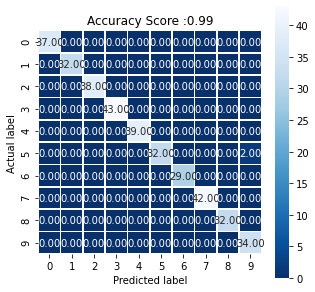

In [23]:
plt.figure(figsize=(5,5))

sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues_r')

plt.ylabel('Actual label')

plt.xlabel('Predicted label')

A=f'Accuracy Score :{accuracy:.2f}'

plt.title(A)

plt.show()

<b>2. Implement a Multi-layer perceptron model and test the model using any data set of your choice. The output should include Accuracy, Error rate, Precision, and recall rate along with the confusion matrix. </b>

In [5]:
import pandas as pd
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler  
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import classification_report, confusion_matrix 

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [6]:
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

In [7]:
# Reading the dataset through a Pandas function
irisdata = pd.read_csv(url, names=names)  

In [8]:
# Takes first 4 columns and assign them to variable "X"
X = irisdata.iloc[:, 0:4]
# Takes first 5th columns and assign them to variable "Y". Object dtype refers to strings.
y = irisdata.select_dtypes(include=[object])  

In [9]:
X.head()

,sepal-length,sepal-width,petal-length,petal-width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
y.head()

,Class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [11]:
y.Class.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [12]:
# Now transforming categorial into numerical values
le = preprocessing.LabelEncoder()
y = y.apply(le.fit_transform)

In [13]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [14]:
# Now for train and test split (80% of  dataset into  training set and  other 20% into test data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)  

In [15]:
# Feature scaling
scaler = StandardScaler()  
scaler.fit(X_train)
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

In [18]:
y_train

,Class
58,1
46,0
84,1
80,1
15,0
...,...
123,2
52,1
56,1
22,0


In [35]:
# Finally for the MLP- Multilayer Perceptron
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)  
mlp.fit(X_train, y_train.values.ravel())  

MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

In [37]:
predictions = mlp.predict(X_test) 
print(predictions)

[1 1 1 0 1 2 0 2 2 1 0 0 1 2 0 2 1 0 2 2 0 1 1 0 0 1 0 0 2 0]


In [39]:
# Last thing: evaluation of algorithm performance in classifying flowers
print("Confusion Matrix :")
print(confusion_matrix(y_test,predictions))
print("Classification Report :")
print(classification_report(y_test,predictions))  

Confusion Matrix :
[[12  0  0]
 [ 0 10  0]
 [ 0  0  8]]
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [41]:
 from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, predictions)
print("Accuracy : ",accuracy)
print("Error rate : ",1-accuracy)

Accuracy :  1.0
Error rate :  0.0


<b>3.Implement the K Nearest Neighbors algorithm and test the algorithm using any dataset of your choice. The output should include Accuracy, Error rate, Precision, and recall rate along with the confusion matrix <br>
dataset used: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database  </b>

## Reading the training data 

In [43]:
import pandas as pd
#read in the data using pandas
df = pd.read_csv('C:/Users/KHYATI/Documents/diabetes.csv')
#check data has been read in properly
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [44]:
#check number of rows and columns in dataset
df.shape

(768, 9)

## Split up the dataset into inputs and targets

In [47]:
#create a dataframe with all training data except the target column
X = df.drop(columns=['Outcome'])
#check that the target variable has been removed
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [48]:
#separate target values
y = df['Outcome'].values
#view target values
y[0:5]

array([1, 0, 1, 0, 1], dtype=int64)

## Split the dataset into train and test data


In [49]:
from sklearn.model_selection import train_test_split
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

## Building and training the model

In [50]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

## Testing the model


In [54]:
#show first 5 model predictions on the test data
predictions=knn.predict(X_test)
print(predictions[0:5])

[0 0 0 0 1]


In [52]:
#check accuracy of our model on the test data
knn.score(X_test, y_test)

0.6688311688311688

In [55]:
print("Confusion Matrix :")
print(confusion_matrix(y_test,predictions))
print("Classification Report :")
print(classification_report(y_test,predictions))  

Confusion Matrix :
[[75 25]
 [26 28]]
Classification Report :
              precision    recall  f1-score   support

           0       0.74      0.75      0.75       100
           1       0.53      0.52      0.52        54

    accuracy                           0.67       154
   macro avg       0.64      0.63      0.63       154
weighted avg       0.67      0.67      0.67       154



In [56]:
 from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, predictions)
print("Accuracy : ",accuracy)
print("Error rate : ",1-accuracy)

Accuracy :  0.6688311688311688
Error rate :  0.3311688311688312
